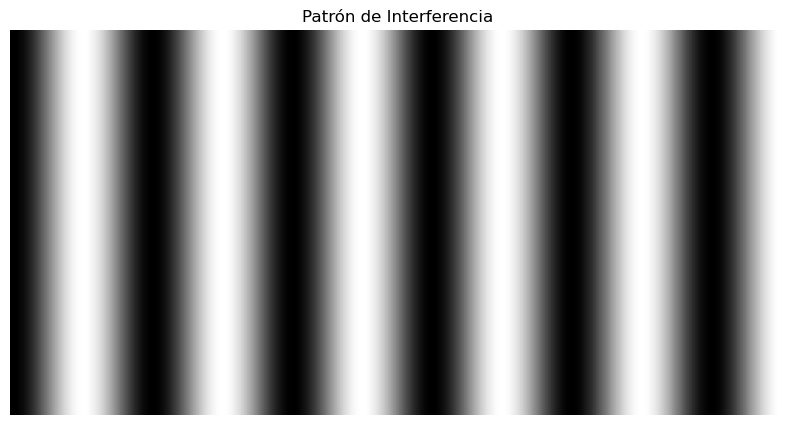

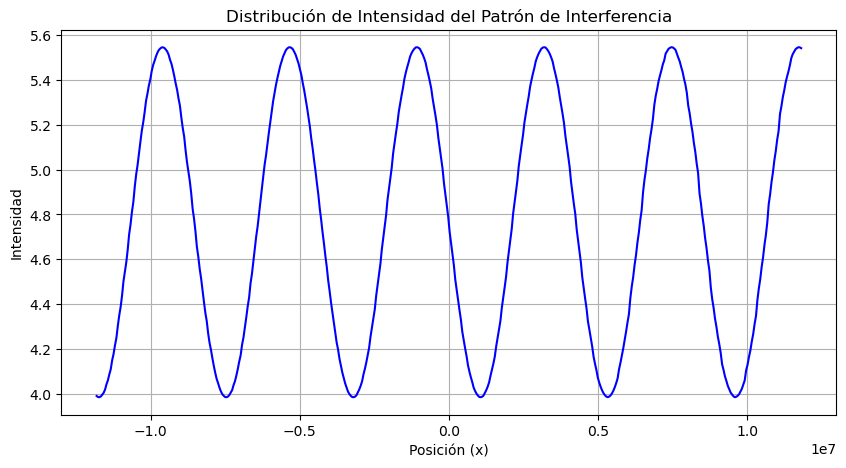

Campo eléctrico de referencia Er: [1 1]
Campo eléctrico incidente Eis: [1.        +0.j         0.92387953+0.38268343j]
Matriz de Jones S:
[[6.123234e-17+1.j 0.000000e+00+0.j]
 [0.000000e+00+0.j 6.123234e-17-1.j]]
Campo eléctrico después de la muestra Es: [6.12323400e-17+1.j         3.82683432e-01-0.92387953j]


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Definición de parámetros físicos
lambda_ = 532e-9  # Longitud de onda en metros (532 nm)
d = 0  # Grosor de la muestra en metros

# Definición de los campos eléctricos de referencia e incidente
Arx = 1  # Amplitud en x del campo de referencia
Ary = 1  # Amplitud en y del campo de referencia
Aisx = 1  # Amplitud en x del campo incidente
Aisy = np.exp(1j * np.pi / 8)  # Amplitud en y del campo incidente con un desfase

Er = np.array([Arx, Ary])  # Campo eléctrico de referencia
Eis = np.array([Aisx, Aisy])  # Campo eléctrico incidente

# Definición del retardo de fase inducido por la birrefringencia
Delta_phi = np.pi

# Construcción de la matriz de Jones del objeto birrefringente
Sxx = np.exp(1j * Delta_phi / 2)
Sxy = 0
Syx = 0
Syy = np.exp(-1j * Delta_phi / 2)
S = np.array([[Sxx, Sxy],
              [Syx, Syy]])

# Cálculo del campo eléctrico transmitido a través del objeto
Es = S @ Eis

# Cálculo del campo de salida después de la interferencia con el campo de referencia
Eout = Er + Es

# Cálculo de la intensidad detectada en el interferómetro
I = np.abs(Eout[0])**2 + np.abs(Eout[1])**2

# Definición de variables para la simulación del patrón de interferencia
k = 2 * np.pi / lambda_  # Número de onda
x = np.linspace(-k, k, 500)  # Coordenada espacial
mu = 0  # Desfase global

# Cálculo del desfase relativo basado en las amplitudes de los campos
vartheta = np.arctan2(-np.abs(Er[1]) * np.abs(Es[1]) * np.sin(Delta_phi),
                      np.abs(Er[0]) * np.abs(Es[0]) + np.abs(Er[1]) * np.abs(Es[1]) * np.cos(Delta_phi))

# Cálculo de la distribución de intensidad del patrón de interferencia
I_pattern = I + 2 * np.abs(Er[0] * Es[0] + Er[1] * Es[1]) * np.cos(mu + k * x - vartheta)

# Normalización de la intensidad para escalar entre 0 y 255 (imagen en escala de grises)
I_pattern_norm = (I_pattern - I_pattern.min()) / (I_pattern.max() - I_pattern.min()) * 255
I_pattern_norm = np.uint8(I_pattern_norm)

# Crear imagen de patrón de interferencia en escala de grises
height = 500  # Altura de la imagen en píxeles
pattern_image = np.tile(I_pattern_norm, (height, 1))

# Aplicar un filtro Gaussiano para suavizar las franjas
pattern_image = cv2.GaussianBlur(pattern_image, (5, 5), 0)

# Mostrar la imagen del patrón de interferencia
plt.figure(figsize=(10, 5))
plt.imshow(pattern_image, cmap='gray', aspect='auto')
plt.axis('off')
plt.title("Patrón de Interferencia")
plt.show()

# Graficar la intensidad del patrón de interferencia a lo largo del eje x
plt.figure(figsize=(10, 5))
plt.plot(x, I_pattern, color='blue', label="Intensidad del Patrón de Interferencia")
plt.xlabel("Posición (x)")
plt.ylabel("Intensidad")
plt.title("Distribución de Intensidad del Patrón de Interferencia")
plt.grid(True)
plt.show()

# Impresión de resultados
print("Campo eléctrico de referencia Er:", Er)
print("Campo eléctrico incidente Eis:", Eis)
print("Matriz de Jones S:")
print(S)
print("Campo eléctrico después de la muestra Es:", Es)